In [12]:
import random
M=8 #Nombre de machines
P=4 #Nombre de types

In [13]:
NBR_RUNS = 20
CONFIDENCE_LEVEL = 95 #pourcentage donnant le niveau de confiance des résultats
TOTAL_DURATION = 1000#durée totale simulée
TRANSIENT_DURATION = 200 #temps estimé pour arriver en régime transient
type_parcours={}
type_parcours[0] = [0,1,2,3,7]
type_parcours[1] = [1,3,6]
type_parcours[2] = [2,4,0]
type_parcours[3] = [4,5,6,7]

In [3]:
import random
M=3
P=1
W=2
#Employes=[[0],[0],[1],[1],[2],[2],[3],[3]] 
Employes=[[0,1],[0,1],[0,1]] 
NBR_RUNS = 20
CONFIDENCE_LEVEL = 95 #pourcentage donnant le niveau de confiance des résultats
TOTAL_DURATION = 1000#durée totale simulée
TRANSIENT_DURATION = 200 #temps estimé pour arriver en régime transient
type_parcours={}
type_parcours[0] = [0,1,2]

In [14]:
#instance I1
W=4 #Nombre des employes
Employes=[[0],[0],[1],[1],[2],[2],[3],[3]] #Les employes qui peuvent travailler sur la machine m


In [5]:
#instance I2
W=4 #Nombre des employes
Employes=[[0,3],[1,2],[0,3],[2,3],[1,2],[0,3],[1,3],[1,2]] #Les employes qui peuvent travailler sur la machine m


In [6]:
#instance I3
W=6 #Nombre des employes
Employes=[[0,5],[0],[1,4],[2],[3],[2,4],[5],[3]] #Les employes qui peuvent travailler sur la machine m


In [7]:
#instance I4
W=6 #Nombre des employes
Employes=[[0,2,5],[0,4],[0,2,3],[1,5],[1,3],[1,2,4],[2,3,4,5],[2,3,5]] #Les employes qui peuvent travailler sur la machine m


In [26]:
def Règle_affectation_employé_libéré(i,self,sys,Liste_machines_dispo,employé):
    if len(Liste_machines_dispo)!=0:
        if (i==1): #choisir la première machine trouvé
            return Liste_machines_dispo[0]
        if (i==2): #choisir la machine qui a le temps de service le plus petit
            T=[]
            for j in range(len(Liste_machines_dispo)):
                T.append((Liste_machines_dispo[j],sys.queues[Liste_machines_dispo[j]].attente[0][2].service_time[Liste_machines_dispo[j]]))
            T.sort(key=lambda x: x[1]) 
            return(T[0][0])
        if(i==3):#choisir la machine qui a le temps de service le plus grand
            T=[]
            for j in range(len(Liste_machines_dispo)):
                T.append((Liste_machines_dispo[j],sys.queues[Liste_machines_dispo[j]].attente[0][2].service_time[Liste_machines_dispo[j]]))
            T.sort(key=lambda x: x[1]) 
            return(T[len(T)-1][0])
        if (i==4):#choisir la machine qui a la liste d'attente la plus grande
            T=[]
            for j in range(len(Liste_machines_dispo)):
                T.append((Liste_machines_dispo[j],len(sys.queues[Liste_machines_dispo[j]].attente)))
            T.sort(key=lambda x: x[1]) 
            return(T[len(T)-1][0])
            
        if(i==5): #choisir la machine qui a le moins d'employés capable de l'utiliser
            T=[]
            for i in range(len(Liste_machines_dispo)):
                T.append((Liste_machines_dispo[i],len(Employes[Liste_machines_dispo[i]])))
            T.sort(key=lambda x: x[1])
            return(T[0][0]) 
        if(i==6):#choisir la machine qui va avoir le plus de produits à la prochaine étape
            T=[]
            L=[]
            for m in range(M):
                L.append(0)
            for m in range(M):
                for j in (sys.queues[m].service):
                    if (j.next_machine(m)!=None):
                        L[j.next_machine(m)]+=1
            for i in range(len(Liste_machines_dispo)):
                T.append((Liste_machines_dispo[i],L[Liste_machines_dispo[i]]))
            T.sort(key=lambda x: x[1])
            return(T[len(T)-1][0]) 
        if(i==7): #donner la priorité à la dernière machine dans le parcours dans la majorité des produits
            priorité=[]
            T=[]
            for m in range(M):
                priorité.append(0)
            for j in range(P):
                priorité[type_parcours[j][-1]]+=1
            for i in range(len(Liste_machines_dispo)):
                T.append((Liste_machines_dispo[i],priorité[Liste_machines_dispo[i]]))
            T.sort(key=lambda x: x[1])
            return(T[len(T)-1][0])
        if(i==8):#choisir la machine qui va avoir le plus de produits à la prochaine étape et la liste d'attente la plus grande
            T=[]
            L=[]
            for m in range(M):
                L.append(0)
            for m in range(M):
                for j in (sys.queues[m].service):
                    if (j.next_machine(m)!=None):
                        L[j.next_machine(m)]+=1
            for i in range(len(Liste_machines_dispo)):
                T.append((Liste_machines_dispo[i],L[Liste_machines_dispo[i]]+len(sys.queues[Liste_machines_dispo[i]].attente)))
            T.sort(key=lambda x: x[1])
            return(T[len(T)-1][0])
        if(i==9):#choisir la machine qui va avoir le plus de produits à la prochaine étape et la liste d'attente la plus grande et en service
            T=[]
            L=[]
            for m in range(M):
                L.append(0)
            for m in range(M):
                for j in (sys.queues[m].service):
                    if (j.next_machine(m)!=None):
                        L[j.next_machine(m)]+=1
            for k in range(len(Liste_machines_dispo)):
                T.append((Liste_machines_dispo[k],L[Liste_machines_dispo[k]]+len(sys.queues[Liste_machines_dispo[k]].attente)+len(sys.queues[Liste_machines_dispo[k]].service)))
            T.sort(key=lambda x: x[1])
            return(T[len(T)-1][0]) 
        if(i==10):#choisir la machine qui va avoir le plus de produits à la prochaine étape et le temps de service le plus grand
            T=[]
            L=[]
            for m in range(M):
                L.append(0)
            for m in range(M):
                for j in (sys.queues[m].service):
                    if (j.next_machine(m)!=None):
                        L[j.next_machine(m)]+=1
            for k in range(len(Liste_machines_dispo)):
                T.append((Liste_machines_dispo[k],L[Liste_machines_dispo[k]]+sys.queues[Liste_machines_dispo[k]].attente[0][2].service_time[Liste_machines_dispo[k]]))
            T.sort(key=lambda x: x[1])
            return(T[len(T)-1][0])
        if(i==11):#choisir la machine qui va avoir le plus de produits à la prochaine étape et le temps de service le plus grand
            T=[]
            L=[]
            for m in range(M):
                L.append(0)
            for m in range(M):
                for j in (sys.queues[m].service):
                    if (j.next_machine(m)!=None):
                        L[j.next_machine(m)]+=1
            for k in range(len(Liste_machines_dispo)):
                T.append((Liste_machines_dispo[k],L[Liste_machines_dispo[k]]-sys.queues[Liste_machines_dispo[k]].attente[0][2].service_time[Liste_machines_dispo[k]]))
            T.sort(key=lambda x: x[1])
            return(T[len(T)-1][0])
        if (i==12):#choisir la machine qui a la liste d'attente la plus grande et le temps le plus grand de service
            T=[]
            for j in range(len(Liste_machines_dispo)):
                T.append((Liste_machines_dispo[j],len(sys.queues[Liste_machines_dispo[j]].attente)+sys.queues[Liste_machines_dispo[j]].attente[0][2].service_time[Liste_machines_dispo[j]]))
            T.sort(key=lambda x: x[1]) 
            return(T[len(T)-1][0])
        if(i==13):#choisir la machine qui va avoir le plus de produits à la prochaine étape et le temps de service le plus grand
            T=[]
            L=[]
            for m in range(M):
                L.append(0)
            for m in range(M):
                for j in (sys.queues[m].service):
                    if (j.next_machine(m)!=None):
                        L[j.next_machine(m)]+=1
            for k in range(len(Liste_machines_dispo)):
                T.append((Liste_machines_dispo[k],L[Liste_machines_dispo[k]]+sys.queues[Liste_machines_dispo[k]].attente[0].service_time[Liste_machines_dispo[k]]))
            T.sort(key=lambda x: x[1])
            return(T[len(T)-1][0])
        if(i==14):#choisir la machine qui le temps d'attente à la prochaine machine du premier produit + temps de service du premier
            T=[]
            for k in range(len(Liste_machines_dispo)):
                s=0
                if (sys.queues[Liste_machines_dispo[k]].attente[0][2].next_machine(Liste_machines_dispo[k])!= None):
                    for j in range(len(sys.queues[sys.queues[Liste_machines_dispo[k]].attente[0][2].next_machine(Liste_machines_dispo[k])].attente)):
                        s+=sys.queues[sys.queues[Liste_machines_dispo[k]].attente[0][2].next_machine(Liste_machines_dispo[k])].attente[0][2].service_time[sys.queues[Liste_machines_dispo[k]].attente[0][2].next_machine(Liste_machines_dispo[k])]
                T.append((Liste_machines_dispo[k],sys.queues[Liste_machines_dispo[k]].attente[0][2].service_time[Liste_machines_dispo[k]]+s))
            T.sort(key=lambda x: x[1])
            return(T[len(T)-1][0]) 
        if(i==15):#choisir la machine qui le temps d'attente à la prochaine machine du premier produit + temps de service du premier le plus grand + qualified worker le plus petit
            T=[]
            for k in range(len(Liste_machines_dispo)):
                s=0
                if (sys.queues[Liste_machines_dispo[k]].attente[0][2].next_machine(Liste_machines_dispo[k])!= None):
                    for j in range(len(sys.queues[sys.queues[Liste_machines_dispo[k]].attente[0][2].next_machine(Liste_machines_dispo[k])].attente)):
                        s+=sys.queues[sys.queues[Liste_machines_dispo[k]].attente[0][2].next_machine(Liste_machines_dispo[k])].attente[0][2].service_time[sys.queues[Liste_machines_dispo[k]].attente[0][2].next_machine(Liste_machines_dispo[k])]
                T.append((Liste_machines_dispo[k],sys.queues[Liste_machines_dispo[k]].attente[0][2].service_time[Liste_machines_dispo[k]]+s-len(Employes[Liste_machines_dispo[k]])))
            T.sort(key=lambda x: x[1])
            return(T[len(T)-1][0]) 
        if(i==18):#choisir la machine qui le temps d'attente à la prochaine machine du premier produit + temps de service du premier le plus grand + qualified worker le plus petit
            T=[]
            L=[]
            for m in range(M):
                L.append(0)
            for m in range(M):
                for j in (sys.queues[m].service):
                    if (j.next_machine(m)!=None):
                        L[j.next_machine(m)]+=j.service_time[j.next_machine(m)]
            for k in range(len(Liste_machines_dispo)):
                s=0
                if (sys.queues[Liste_machines_dispo[k]].attente[0][2].next_machine(Liste_machines_dispo[k])!= None):
                    for j in range(len(sys.queues[Liste_machines_dispo[k]].attente)):
                        s+=sys.queues[Liste_machines_dispo[k]].attente[0][2].service_time[Liste_machines_dispo[k]]
                T.append((Liste_machines_dispo[k],s+L[Liste_machines_dispo[k]]))
            T.sort(key=lambda x: x[1])
            return(T[0][0])
        if(i==16):#choisir la machine qui le temps d'attente à la prochaine machine du premier produit + temps de service du premier + qualified worker le plus petit
            T=[]
            for k in range(len(Liste_machines_dispo)):
                s=0
                if (sys.queues[Liste_machines_dispo[k]].attente[0][2].next_machine(Liste_machines_dispo[k])!= None):
                    for j in range(len(sys.queues[sys.queues[Liste_machines_dispo[k]].attente[0][2].next_machine(Liste_machines_dispo[k])].attente)):
                        s+=sys.queues[sys.queues[Liste_machines_dispo[k]].attente[0][2].next_machine(Liste_machines_dispo[k])].attente[0][2].service_time[sys.queues[Liste_machines_dispo[k]].attente[0][2].next_machine(Liste_machines_dispo[k])]
                T.append((Liste_machines_dispo[k],sys.queues[Liste_machines_dispo[k]].attente[0][2].service_time[Liste_machines_dispo[k]]+s+len(Employes[Liste_machines_dispo[k]])))
            T.sort(key=lambda x: x[1])
            return(T[0][0]) 
        if(i==17):#choisir la machine qui le temps d'attente à la prochaine machine du premier produit + temps de service du premier + qualified worker le plus petit
            T=[]
            L=[]
            for m in range(M):
                L.append(0)
            for m in range(M):
                for j in (sys.queues[m].service):
                    if (j.next_machine(m)!=None):
                        L[j.next_machine(m)]+=1
            for k in range(len(Liste_machines_dispo)):
                s=0
                if (sys.queues[Liste_machines_dispo[k]].attente[0][2].next_machine(Liste_machines_dispo[k])!= None):
                    for j in range(len(sys.queues[sys.queues[Liste_machines_dispo[k]].attente[0][2].next_machine(Liste_machines_dispo[k])].attente)):
                        s+=sys.queues[sys.queues[Liste_machines_dispo[k]].attente[0][2].next_machine(Liste_machines_dispo[k])].attente[0][2].service_time[sys.queues[Liste_machines_dispo[k]].attente[0][2].next_machine(Liste_machines_dispo[k])]
                T.append((Liste_machines_dispo[k],sys.queues[Liste_machines_dispo[k]].attente[0][2].service_time[Liste_machines_dispo[k]]+s+len(Employes[Liste_machines_dispo[k]])+L[Liste_machines_dispo[k]]))
            T.sort(key=lambda x: x[1])
            return(T[0][0]) 
def Règle_affectation_employé_à_une_machine(i,self,sys,Employés_dispos,num_machine):
    if len(Employés_dispos)!=0:
        if (i==1): #choisir le premier employé trouvé 
            return Employés_dispos[0]
        if (i==2): #choisir l'employé qui a le moins de skills
            T=[]
            for j in range(len(Employés_dispos)):
                T.append((Employés_dispos[j],Employes.count([Employés_dispos[j]])))
            T.sort(key=lambda x: x[1]) 
            return(T[0][0])
def Priorité(i,self,sys,produit,time,machine):
     if (i==1):  #FIFO
        return(time)
     if (i==2): #Service time + temps d'attente sur la prochaine machine
        s=0
        if (produit.next_machine(machine)!= None):
            for j in range(len(sys.queues[produit.next_machine(machine)].attente)):
                s+=sys.queues[produit.next_machine(machine)].attente[0][2].service_time[produit.next_machine(machine)]
        return(produit.service_time[machine]+s)
     if (i==3):#time arrival
        return(produit.arrival)   
     if (i==4):#service time
        return(produit.service_time[machine])   
     if (i==5):#WINQ
        s=0
        if (produit.next_machine(machine)!= None):
            for j in range(len(sys.queues[produit.next_machine(machine)].attente)):
                s+=sys.queues[produit.next_machine(machine)].attente[0][2].service_time[produit.next_machine(machine)]
        return(s)   

In [16]:
#temps d'arrivée pour le type i 
def interarrival_time(i):
    if(i==0):
        return random.expovariate(0.29)
    if(i==1):
        return random.expovariate(0.32)
    if(i==2):
        return random.expovariate(0.47)
    if(i==3):
        return random.expovariate(0.38)

def service_time(Tmin,Tmax):
    return random.uniform(Tmin,Tmax)

In [17]:
#classe file d'attente
        
class Queue(object):
    
    def __init__(self):
        self.attente = [] #contient la liste des produits en attente
        self.service = [] #contient le produit en service, normalement qu'un seul produit à la fois
        self.available = True #vaut vrai quand disponible
        self.worker=-1 #-1 si il n y a pas de worker

In [18]:
#classe produit
class Produit(object):
    type_parcours = {}
    
    def __init__(self,i,produit_type):
        self.id = i  #identifiant du produit
        self.arrival = -1 #vaut -1 à l'arrivée
        self.departure = -1 #vaut -1 tant qu'il n'est pas reparti
        #self.num_machine=0
        self.type=produit_type
        #Produit.type_parcours[0] = [0,1,2]
        Produit.type_parcours[0] = [0,1,2,3,7]
        Produit.type_parcours[1] = [1,3,6]
        Produit.type_parcours[2] = [2,4,0]
        Produit.type_parcours[3] = [4,5,6,7]
        self.parcours = Produit.type_parcours[self.type]
        
        if(self.type==0):
            self.service_time=[service_time(0.58,0.78),service_time(0.23,0.56),service_time(0.81,0.93),service_time(0.12,0.39),0,0,0,service_time(0.82,1.04)]
        if(self.type==1):
            self.service_time=[0,service_time(0.59,0.68),0,service_time(0.74,0.77),0,0,service_time(0.30,0.55),0]
        if(self.type==2):
            self.service_time=[service_time(0.57,0.64),0,service_time(0.37,0.54),0,service_time(0.35,0.63),0,0,0]
        if(self.type==3):
            self.service_time=[0,0,0,0,service_time(0.36,0.51),service_time(0.61,0.70),service_time(0.78,0.85),service_time(0.18,0.37)]
        
        
    def next_machine(self, current_machine):
        for j in range(len(self.parcours)-1):
            if (self.parcours[j]==current_machine) :
                return self.parcours[j+1]
        return None


In [30]:
"Simulation d'une M/M/m"

import heapq #on utilise une heap pour maintenir l'échéancier ; y place un élément en O(log n), récupère le premier en O(1)

#classe Système, contient le système, mais aussi l'échéancier

class System(object):
     
    def __init__(self):
        self.schedule = [] #échéancier
        self.produits = [] #la liste des produits
        self.queues=[]
        for i in range(M):
            self.queues.append(Queue())
        self.salle_attente=[i for i in range(W)]
        self.employe_machine=[-1 for i in range(M)] #l employe a la machine m -1 si il n y a pas d employes
        
#classe événement

class Event(object):
    
    def __init__(self, time):
        self.time = time
        self.type = ""

#sous-classe "fin de simulation"

class Event_end(Event):
    
    def __init__(self, time):
        self.time = time
        self.type = "fin"


        
#sous-classe "arrivée d'un produit"

class Event_arrival(Event):
    
    def __init__(self, time,produit_type):
        self.time = time
        self.type = "arrival"
        self.produit_type=produit_type
    def action(self, sys):
        produit = Produit(len(sys.produits),self.produit_type)
        produit.arrival = self.time
        sys.produits.append(produit)
        #print("Le produit %d de type %d  arrive à %.2f" % (produit.id,produit.type,self.time))
        #print(produit.parcours)
       # print(produit.arrival)
        #print(sys.produits[0].arrival)
        
        #vérifier si un employé est dispo
        Employe_dispo=False
        Employes_dispo=[]
        for i in range(len(sys.salle_attente)):
            for j in range(len(Employes[produit.parcours[0]])):
                if(sys.salle_attente[i] == Employes[produit.parcours[0]][j]): 
                    Employe_dispo=True
                    employ=sys.salle_attente[i]
                    Employes_dispo.append(employ)
        employ=Règle_affectation_employé_à_une_machine(2,self,sys,Employes_dispo,produit.parcours[0])          
        if ((len(sys.queues[produit.parcours[0]].service)!=0) or (not(Employe_dispo))) : 
            #*************sys.queues[produit.parcours[0]].attente.append(produit)
            heapq.heappush(sys.queues[produit.parcours[0]].attente, (Priorité(1,self,sys,produit,self.time,produit.parcours[0]), produit.id, produit))
            #print("Le produit %d de type %d  sera en liste d'attente à la machine %d à %.2f" % (produit.id,produit.type,produit.parcours[0],self.time))
          #  print('salle d attente:',sys.salle_attente)
          #  for m in range(M):
          #      print('liste d attente:',m,sys.queues[m].attente)
        else:
           #******** sys.queues[produit.parcours[0]].attente.append(produit)
            heapq.heappush(sys.queues[produit.parcours[0]].attente, (Priorité(1,self,sys,produit,self.time,produit.parcours[0]),produit.id,  produit))
            sys.salle_attente.remove(employ)
            pro=heapq.heappop(sys.queues[produit.parcours[0]].attente)[2]
            sys.queues[produit.parcours[0]].service.append(pro)
            sys.employe_machine[produit.parcours[0]]=employ
            #print("Le produit %d de type %d  sera traite par l'employe %d à la machine %d à %.2f" % (pro.id,pro.type,employ,produit.parcours[0],self.time))
           # print('salle d attente:',sys.salle_attente)
            #if (pro!=produit):
                #print("Le produit %d de type %d  sera en liste d'attente à la machine %d à %.2f" % (produit.id,produit.type,produit.parcours[0],self.time))
           # for m in range(M):
            #    print('liste d attente:',m,sys.queues[m].attente)
            e_service = Event_end_service(pro.id, self.time + pro.service_time[produit.parcours[0]],produit.parcours[0])
            heapq.heappush(sys.schedule, (e_service.time,pro.id, e_service))
        e_next_arrival = Event_arrival(self.time + interarrival_time(produit.type),produit.type)
        heapq.heappush(sys.schedule, (e_next_arrival.time,produit.id, e_next_arrival))
        
        
            
        
         


            

    
#sous-classe "départ d'un produit vers une autre machine"
            
class Event_end_service(Event):
    
    def __init__(self, i, time,num_machine): 
        self.time = time
        self.type = "service"
        self.produit_id = i
        self.num_machine=num_machine
    
    def action(self, sys):
        produit = sys.queues[self.num_machine].service.pop()
        
        if(produit.next_machine(self.num_machine) == None):
            #print("Le produit %d quitte le systeme à %.2f " % (self.produit_id, self.time))
            produit.departure=self.time
        else: 
            #print("Le produit %d repart à %.2f de la machine %d" % (self.produit_id, self.time,self.num_machine))
           # print('salle d attente:', sys.salle_attente)
           # for m in range(M):
           #     print('liste d attente:',m,sys.queues[m].attente)
            #affecter produit liste d'attente next machine
            #******sys.queues[produit.next_machine(self.num_machine)].attente.append(produit)
            #heapq.heapify(sys.queues[produit.next_machine(self.num_machine)].attente)
            heapq.heappush(sys.queues[produit.next_machine(self.num_machine)].attente, (Priorité(1,self,sys,produit,self.time,produit.next_machine(self.num_machine)),produit.id,  produit))
            #print("Le produit %d de type %d  sera en liste d'attente à la machine %d à %.2f" % (produit.id,produit.type,produit.next_machine(self.num_machine),self.time))
            
        #affecter l'employé à la salle d'attente ou à une autre machine
        employé=sys.employe_machine[self.num_machine]
        sys.employe_machine[self.num_machine]=-1
        test=False
        test_affecter_employé_next_machine=False
        test_affecter_employé_machine_actuelle=False
        Liste_machines_dispo=[]
        for m in range(M):
            if ((employé in Employes[m]) and (sys.employe_machine[m]==-1) and (len(sys.queues[m].attente)) and (len(sys.queues[m].service)==0)):
                    test=True
                    Liste_machines_dispo.append(m)
        if (test):
            machine=Règle_affectation_employé_libéré(4,self,sys,Liste_machines_dispo,employé)# où va l'employé qui était à la machine actuelle
            if (machine== self.num_machine):
                test_affecter_employé_machine_actuelle=True
            if (machine != produit.next_machine(self.num_machine)):

                next_produit =  heapq.heappop(sys.queues[machine].attente)[2]
                sys.queues[machine].service.append(next_produit)
                sys.employe_machine[machine]=employé
                #print("Le produit %d de type %d  sera traite par l'employe %d à la machine %d à %.2f" % (next_produit.id,next_produit.type,employé,machine,self.time))
                #print('salle d attente:',sys.salle_attente)
                #for m in range(M):
                 #   print('liste d attente:',m,sys.queues[m].attente)
                e_service = Event_end_service(next_produit.id, self.time + next_produit.service_time[machine],machine)
                heapq.heappush(sys.schedule, (e_service.time,next_produit.id,  e_service))
            else: #la règle d'affectation donne que cet employé va aller à next machine est le meilleur choix
                test_affecter_employé_next_machine=True
        else:
            sys.salle_attente.append(employé)
            
            
            
        if not(produit.next_machine(self.num_machine) == None):

            #affecter produit next machine
            if (len(sys.queues[produit.next_machine(self.num_machine)].service)==0):
                #Verifier si un employé est dispo pour la machine suivante
                Employe_dispo=False
                Employés_dispos=[]
                if (test_affecter_employé_next_machine): # Si la règle d'affectation de l'employé précédent a donné next machine, on l'ajoute aux employés dispos
                    Employe_dispo=True
                    Employés_dispos.append(employé)
                for i in range(len(sys.salle_attente)):
                    for j in Employes[produit.next_machine(self.num_machine)]:
                        if(sys.salle_attente[i] == j):
                            Employe_dispo=True
                            Employés_dispos.append(sys.salle_attente[i])
                        
                employ=Règle_affectation_employé_à_une_machine(2,self,sys,Employés_dispos,produit.next_machine(self.num_machine))
                
                if(Employe_dispo):
                    if (employ != employé):
                        sys.salle_attente.remove(employ)
                            
                    #mettre la next machine en service avec le premier produit en liste d'attente
                    
                    p,q,next_produit =  heapq.heappop(sys.queues[produit.next_machine(self.num_machine)].attente)
                    sys.queues[produit.next_machine(self.num_machine)].service.append(next_produit)
                    sys.employe_machine[produit.next_machine(self.num_machine)]=employ
                    #print("Le produit %d de type %d  sera traite par l'employe %d à la machine %d à %.2f" % (next_produit.id,next_produit.type,employ,produit.next_machine(self.num_machine),self.time))
                    #print('salle d attente:::::::::::::::::',sys.salle_attente)
                    #for m in range(M):
                     #   print('liste d attente:',m,sys.queues[m].attente)
                    e_service = Event_end_service(next_produit.id, self.time + next_produit.service_time[produit.next_machine(self.num_machine)],produit.next_machine(self.num_machine))
                    heapq.heappush(sys.schedule, (e_service.time,next_produit.id,  e_service))
                        
                    
                        
                    #---------------------------------------------------
                    #Si l'employé affecté est différent de l'employé précédent et si on est censé l'affecter à next machine, il faut affecter cet employé à une machine ou à la salle d'attente
                    if (employ != employé) and (test_affecter_employé_next_machine): 
                        test=False
                        Liste_machines_dispo=[]
                        for m in range(M):
                            if ((employé in Employes[m]) and (sys.employe_machine[m]==-1) and (len(sys.queues[m].attente)) and (len(sys.queues[m].service)==0)):
                                test=True
                                Liste_machines_dispo.append(m)
                        if (test):
                            machine=Règle_affectation_employé_libéré(4,self,sys,Liste_machines_dispo,employé)# où va l'employé qui était à la machine actuelle
                            next_produit =  heapq.heappop(sys.queues[machine].attente)[2]
                            
                            sys.queues[machine].service.append(next_produit)
                            sys.employe_machine[machine]=employé
                            #print("Le produit %d de type %d  sera traite par l'employe %d à la machine %d à %.2f" % (next_produit.id,next_produit.type,employé,machine,self.time))
                            #print('salle d attente:',sys.salle_attente)
                            #for m in range(M):
                             #   print('liste d attente:',m,sys.queues[m].attente)
                            e_service = Event_end_service(next_produit.id, self.time + next_produit.service_time[machine],machine)
                            heapq.heappush(sys.schedule, (e_service.time,next_produit.id,  e_service))
                        else:
                            sys.salle_attente.append(employé)
                        #-----------------------------------------------------------
            
            
       #Verifier si un employe est dispo pour la machine libérée
        if not(test_affecter_employé_machine_actuelle): #vérifier que l'employé précédent n'est pas resté sur la machine actuelle
            Employe_dispo=False
            Employés_dispos=[]
            for i in range(len(sys.salle_attente)):
                for j in Employes[self.num_machine]:
                    if(sys.salle_attente[i] == j):
                        Employe_dispo=True
                        employ=sys.salle_attente[i]
                        Employés_dispos.append(employ)
          
            employ=Règle_affectation_employé_à_une_machine(2,self,sys,Employés_dispos,self.num_machine) #quel employé choisir pour cette machine               
            if (len(sys.queues[self.num_machine].attente) and (Employe_dispo) and (len(sys.queues[self.num_machine].service)==0)): #si queue.service contient un produit c à d que l'employé est resté sur cette machine
                sys.salle_attente.remove(employ)
                next_produit =   heapq.heappop(sys.queues[self.num_machine].attente)[2]
               
                sys.queues[self.num_machine].service.append(next_produit)
                sys.employe_machine[self.num_machine]=employ
                #print("Le produit %d de type %d  sera traite par l'employe %d à la machine %d à %.2f" % (next_produit.id,next_produit.type,employ,self.num_machine,self.time))
                #print("salle d'attente:",sys.salle_attente)
                #for m in range(M):
                 #   print('liste d attente:',m,sys.queues[m].attente)
                e_service = Event_end_service(next_produit.id, self.time + next_produit.service_time[self.num_machine],self.num_machine)
                heapq.heappush(sys.schedule, (e_service.time,next_produit.id,  e_service))  
                
        
        
        
       
        

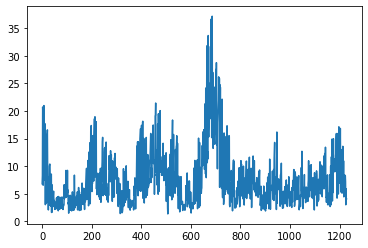

Moyenne empirique : 7.5459


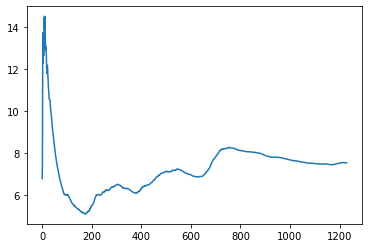

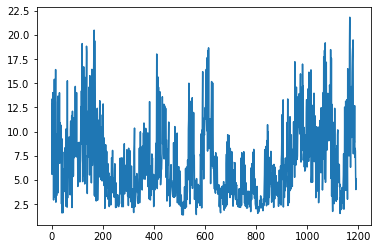

Moyenne empirique : 6.7424


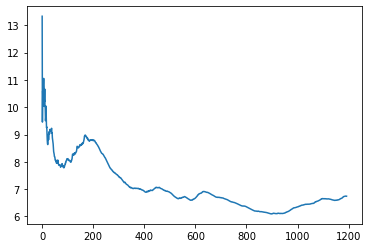

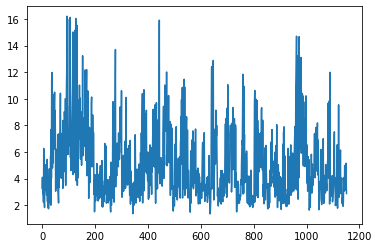

Moyenne empirique : 5.1029


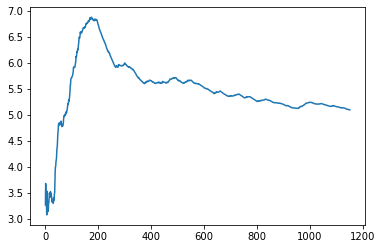

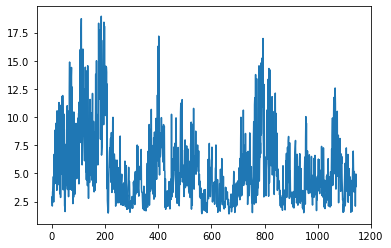

Moyenne empirique : 5.3976


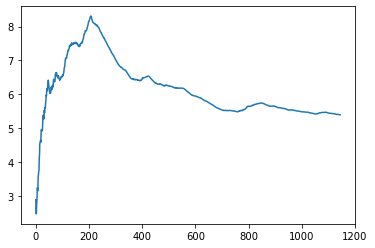

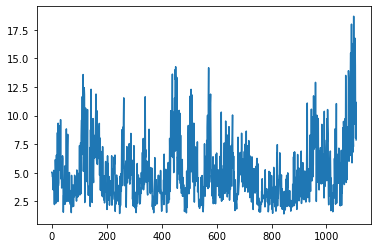

Moyenne empirique : 4.9202


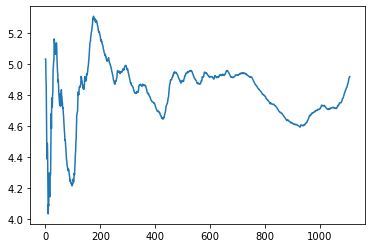

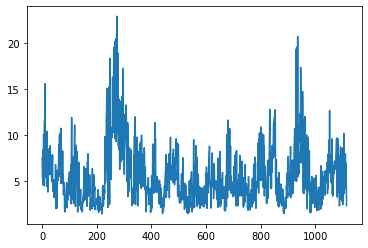

Moyenne empirique : 5.5527


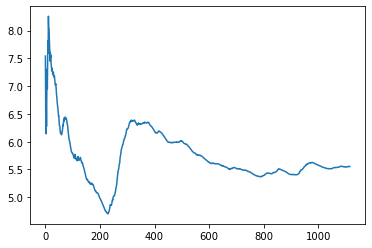

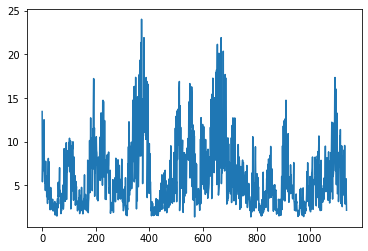

Moyenne empirique : 6.0293


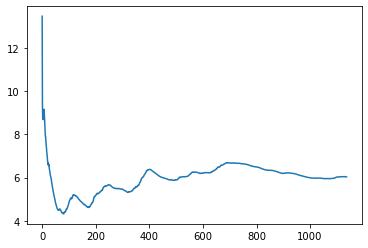

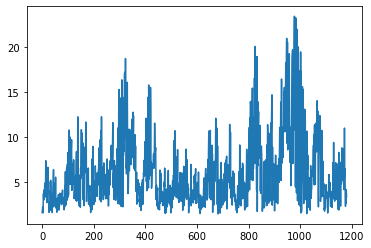

Moyenne empirique : 5.9343


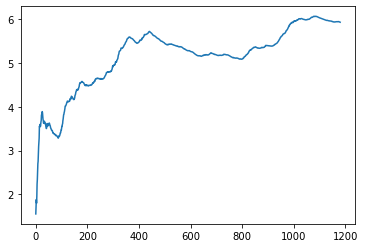

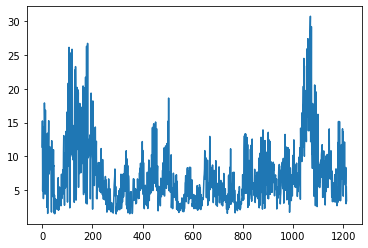

Moyenne empirique : 6.9683


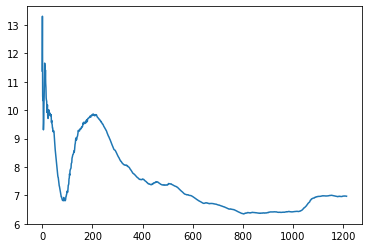

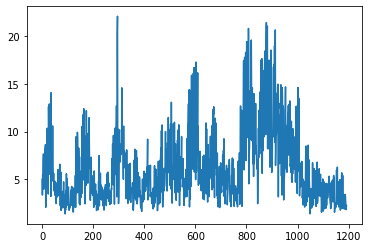

Moyenne empirique : 6.0963


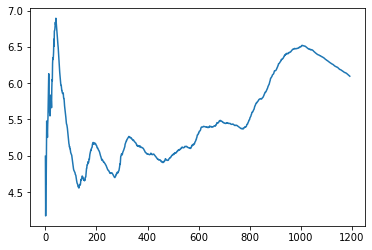

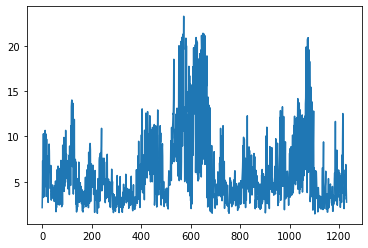

Moyenne empirique : 6.1525


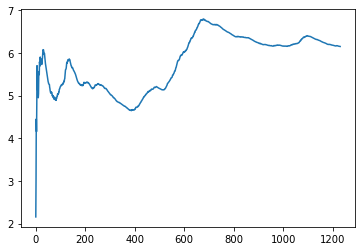

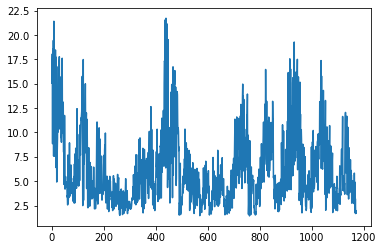

Moyenne empirique : 6.1324


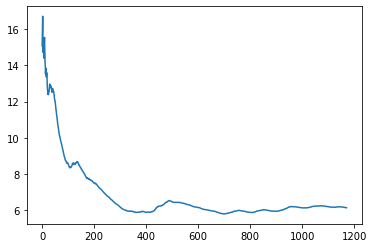

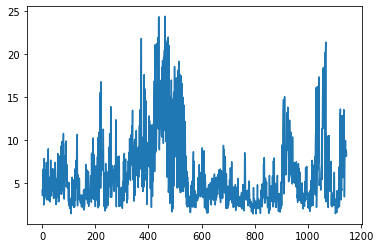

Moyenne empirique : 6.0117


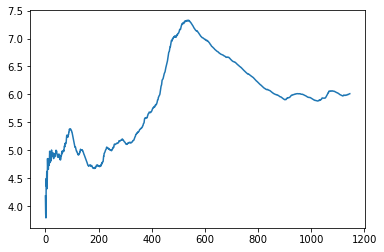

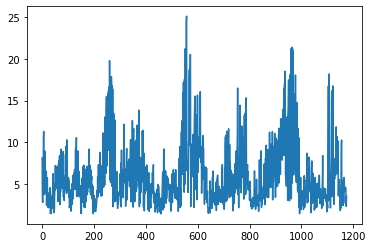

Moyenne empirique : 6.0119


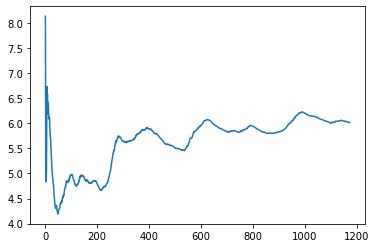

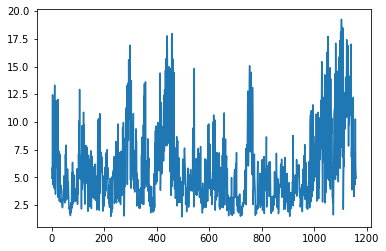

Moyenne empirique : 5.7431


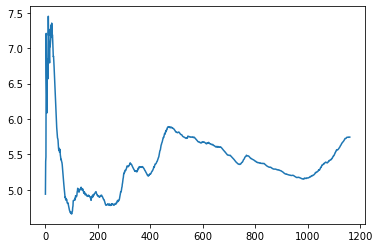

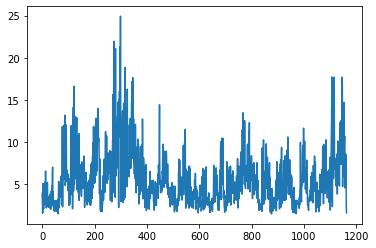

Moyenne empirique : 5.5674


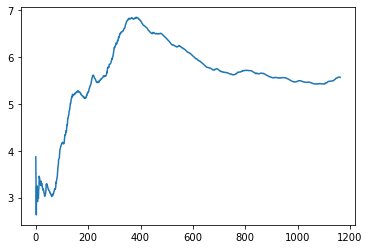

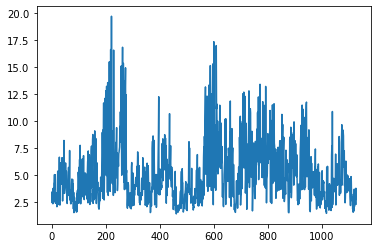

Moyenne empirique : 5.1620


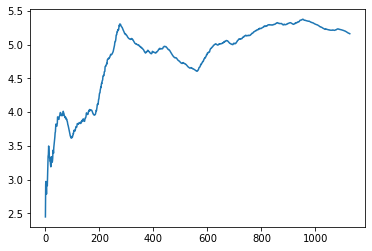

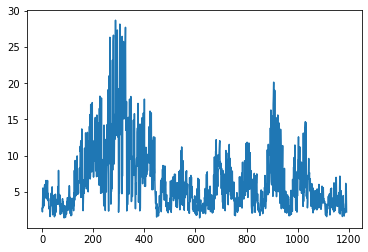

Moyenne empirique : 6.3803


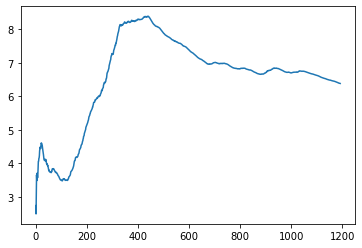

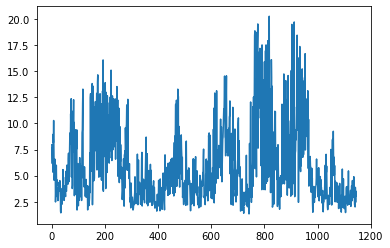

Moyenne empirique : 5.9893


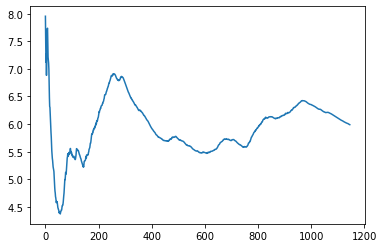

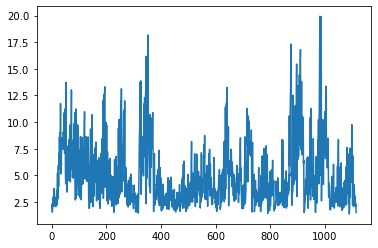

Moyenne empirique : 4.9180


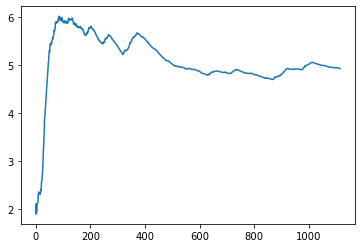

[7.545901000119725, 6.742374485772231, 5.102874108003054, 5.397631226346282, 4.920215948107049, 5.552680731869033, 6.029326084182123, 5.934271386973833, 6.968260863921925, 6.096269117997459, 6.152513676465413, 6.13238103668585, 6.011715934388843, 6.0119356597189, 5.7430719532345265, 5.567402304755123, 5.161950497336949, 6.380278016919311, 5.989275715812461, 4.91798179315345]


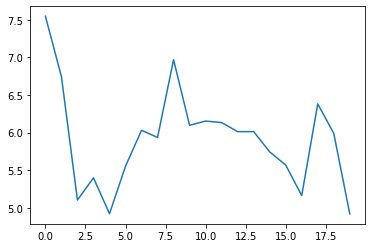

In [31]:
import matplotlib.pyplot as plt
"Lance la simulation, nombre de réplications donné par NBR_RUNS"


from statistics import mean 

sojourn_times_run = [] #contient le temps moyen de séjour pour chaque run

for i in range(NBR_RUNS):
    random.seed(i) #permet de la reproductibilité
    sys = System()
    e_fin = Event_end(TOTAL_DURATION)
    heapq.heappush(sys.schedule, (e_fin.time,1, e_fin))
    #rajouter les P premiers arrivées
    for k in range(P):
        e_next_arrival_event=Event_arrival(interarrival_time(k),k)
        heapq.heappush(sys.schedule, (e_next_arrival_event.time,k, e_next_arrival_event))
    
    while sys.schedule[0][2].type != "fin":
        (time,k, e) = heapq.heappop(sys.schedule)
        #Y.append(e)
        e.action(sys)
    
    sojourn_times_produits = [] #temps de séjour par client pour le run i courant
    for j in range(len(sys.produits)):
        #on ne garde que les clients qui sont arrivés en régime permanent et qui ont quitté la file
        if sys.produits[j].departure != -1 and sys.produits[j].arrival >= TRANSIENT_DURATION:
            sojourn_times_produits.append(sys.produits[j].departure - sys.produits[j].arrival)
    plt.plot(sojourn_times_produits) #temps de séjour pour chaque produit
    plt.show()
    sojourn_times_run.append(mean(sojourn_times_produits))
    
    average_sojourn_times = []
    total = 0
    for j in range(len(sojourn_times_produits)):
        total += sojourn_times_produits[j]
        average_sojourn_times.append(total / (j+1))

    print("Moyenne empirique : %.4f" % average_sojourn_times[len(sojourn_times_produits)-1])

    plt.plot(average_sojourn_times) #temps moyen de séjour pour chaque étape de production d'un nombre j de produit
    plt.show()
print(sojourn_times_run) #moyenne des temps de séjour pour chaque run
plt.plot(sojourn_times_run)

In [32]:
"Fait l'analyse"

from scipy.stats import t, sem

sojourn_mean = mean(sojourn_times_run)
sojourn_sample_standard_error = sem(sojourn_times_run)
confidence_interval = t.interval(CONFIDENCE_LEVEL / 100, NBR_RUNS - 1, sojourn_mean, sojourn_sample_standard_error)

print("Temps moyen de séjour : %.4f" % sojourn_mean)
print("Intervalle de confiance à %d%%: " % CONFIDENCE_LEVEL, end="") ; print("(%.4f, %.4f)" % confidence_interval) 

Temps moyen de séjour : 5.9179
Intervalle de confiance à 95%: (5.6030, 6.2329)


In [ ]:
import matplotlib.pyplot as plt

average_sojourn_times = []
total = 0

sojourn_times_produits = []

for j in range(len(sys.produits)):
    if sys.produits[j].departure != -1:
        sojourn_times_produits.append(sys.produits[j].departure - sys.produits[j].arrival)

plt.plot(sojourn_times_produits)
plt.show()

for j in range(len(sojourn_times_produits)):
    total += sojourn_times_produits[j]
    average_sojourn_times.append(total / (j+1))

print("Moyenne empirique : %.4f" % average_sojourn_times[len(sojourn_times_produits)-1])

plt.plot(average_sojourn_times)
plt.show()